## Introduction

L'objectif de ce Notebook est de montrer l'intérêt de changer de représentation pour observer un signal. Dans le cas de signaux de dimension finie $N$, il s'agira de représenter le vecteur sur une autre base que la base canonique, notamment la base de Fourier.

#### mots clefs
Fourier, Changement de base, numpy array

## Approximation d'un signal
Le module `numpy` de python permet de définir des données de type `array` pour lesquelles les opérations courantes telles transposition et produit matriciel sont déjà codées. Essayer l'exemple suivant : 


In [5]:
import numpy as np
from math import *

A = np.array(((1, 2, 1j), (1, 2j, 3)))
print(A,'\n ---- \n',A.T, '\n ---- \n', A.conj().T, '\n ---- \n', A.dot(A.conj().T), '\n ----')
print(A.dtype)
print(A.shape)

[[1.+0.j 2.+0.j 0.+1.j]
 [1.+0.j 0.+2.j 3.+0.j]] 
 ---- 
 [[1.+0.j 1.+0.j]
 [2.+0.j 0.+2.j]
 [0.+1.j 3.+0.j]] 
 ---- 
 [[1.-0.j 1.-0.j]
 [2.-0.j 0.-2.j]
 [0.-1.j 3.-0.j]] 
 ---- 
 [[ 6.+0.j  1.-1.j]
 [ 1.+1.j 14.+0.j]] 
 ----
complex128
(2, 3)


#### Exercice
On considère la matrice $\mathbf{A}=\begin{bmatrix} 
1 & 1 & 0 & 0 \\
1 & -1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1 
\end{bmatrix}$ et le vecteur $\mathbf{x}=\begin{bmatrix} 
1+\epsilon_1  \\
1  \\
-1  \\
-1-\epsilon_2 
\end{bmatrix}$ avec $\epsilon_1,\,\epsilon_2 \ll 1$.
1. Calculer le vecteur $\mathbf{y}=\mathbf{Ax}$.
2. $1+\epsilon_1,\, 1,\, -1,\, -1-\epsilon_2$ sont par définition les coefficients du vecteur $\mathbf{x}$ dans la base canonique de $\mathbb{C}^4$. Montrer qu'il existe une base $B=\{\mathbf{b_1},\mathbf{b_2},\mathbf{b_3},\mathbf{b_4}\}$ dans laquelle les coefficients du vecteur $\mathbf{x}$ sont les $y_i$. Calculer la matrice $\mathbf{B}=[\mathbf{b_1}\,\mathbf{b_2}\,\mathbf{b_3},\mathbf{b_4}]$.
3. Proposer une approximation *parcimonieuse* de $\mathbf{x}$, notée $\mathbf{P_x}$ qui sera définie par deux coefficients non nuls seulement dans la base $B$. Construire une fonction python `approx` qui renvoie $\mathbf{P_x}$ et prend $(\epsilon_1,\,\epsilon_2)$ en entrée.

In [9]:
#Q1
eps1=10^(-16)
eps2=1/3e15
A = np.array(((1,1,0,0),(1,-1,0,0),(0,0,1,1),(0,0,1,-1)))
x = np.array(((1+eps1),(1),(-1),(-1-eps2)))
y = np.dot(A,x)
#Q2
B = np.linalg.inv(A)
b1 = np.array(((1),(1),(0),(0)))
b2 = np.array(((1),(-1),(0),(0)))
b3 = np.array(((0),(0),(1),(1)))
b4 = np.array(((0),(0),(1),(-1)))
#Q3
def approx(eps1, eps2):
    x = np.array([1 + eps1, 1, -1, -1 - eps2])
    y = np.dot(A, x)

    # Trouver les indices des deux plus grands coefficients en valeur absolue dans y
    idx = np.argsort(np.abs(y))[-2:]
    
    # Créer y approximé avec seulement les deux plus grands coefficients
    y_approx = np.zeros_like(y)
    y_approx[idx] = y[idx]
    
    # Calculer Px dans la base canonique
    Px = np.dot(B, y_approx)
    return Px

# Test de la fonction approx avec les valeurs données
Px = approx(eps1, eps2)
print (Px)



[-5.  1.  0.  0.]


   ## Base de Fourier discrète
   La base de Fourier Discrète sur N points est une base d’ondes pures ou encore sinusoïdes complexes de la forme : $$\mathbf{e}_k(n) = \dfrac{1}{N} \exp(i2\pi\frac{k}{N}n),\: k=0,1,\ldots,N-1.$$
   La décomposition sur cette base d'un signal fini $\mathbf{x}$ donne sa *Transformée de Fourier Discrète*, notée $\mathbf{X}$.

#### Exercice
1. Ecrire une fonction `fourier(k,N)` qui retourne le vecteur colonne `ek` de dimension $N$ pour un $k$ donné.
2. Calculer la matrice $\mathbf{E}=[\mathbf{e}_0,\, \mathbf{e}_1,\, \ldots,\, \mathbf{e}_{N-1}]$. Afficher alors la valeur $\mathbf{E}^H\mathbf{E}$ et en déduire que la base est orthogonale.
3. A l’aide du module `matplotlib` tracer le graphe de $\mathrm{Re}(\mathbf{e}_k(n))$ en fonction de $n$ pour quelques valeurs de k (typ. 0,1,2,3) et $N=64$. Quelle caractéristique commune partagent ces fonctions de $n$ ?
4. Construire une fonction `tfd` qui renvoie dans un vecteur $\mathbf{X}$ les coefficients du vecteur $\mathbf{x}$ dans la base des $\mathbf{e}_k$. Vérifier votre calcul sur un vecteur aléatoire (module `numpy.random`) de dimension $N=8$ à l'aide de la fonction `fft` du module `numpy.fft`. 

#### Application
Construire le signal $x(n)=\cos (2\pi \nu_0 n)+ b(n)$ où $b(n)$ est un bruit blanc gaussien de variance 1, pour $n=0,1,\ldots,N-1$, $N=128$, $\nu_0 = 10/N$. Afficher sur deux graphes disctincts :
* le signal $x(n)$ en fonction de $n$,
* les valeurs $|X(k)|$ en fonction de $k$ et en décibels.

Essayer ensuite avec $\nu_0=0.1$. Pour quelle(s) valeur(s) de $k$, $X(k)$ atteint t-il un maximum global. A quelle valeur de fréquence réduite $\nu$ cela correspond-il ? Commentez ces résultats en terme de précision de la représentation. 

E*E:
 [[ 1.+0.j -0.+0.j  0.+0.j  0.+0.j]
 [-0.-0.j  1.+0.j -0.+0.j  0.+0.j]
 [ 0.-0.j -0.+0.j  1.+0.j -0.+0.j]
 [ 0.-0.j  0.-0.j -0.-0.j  1.+0.j]]


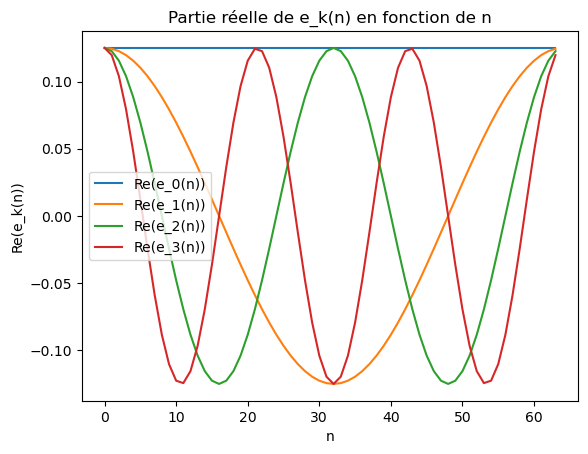

Manual TFD: [ 1.88+0.j   -0.26-0.32j -0.21-0.01j -0.27-0.33j  0.26+0.j   -0.27+0.33j
 -0.21+0.01j -0.26+0.32j]
NumPy FFT: [ 5.32+0.j   -0.73-0.91j -0.58-0.04j -0.76-0.93j  0.75+0.j   -0.76+0.93j
 -0.58+0.04j -0.73+0.91j]


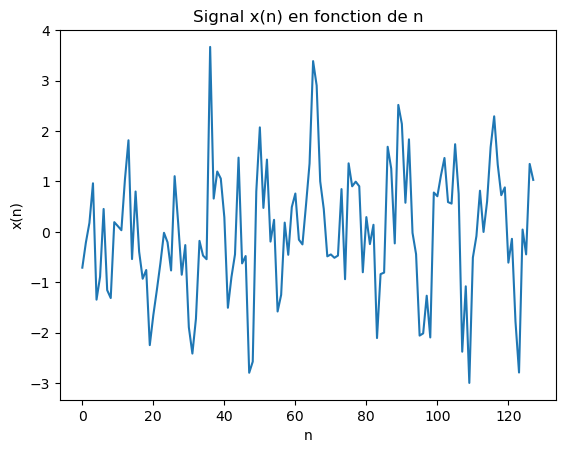

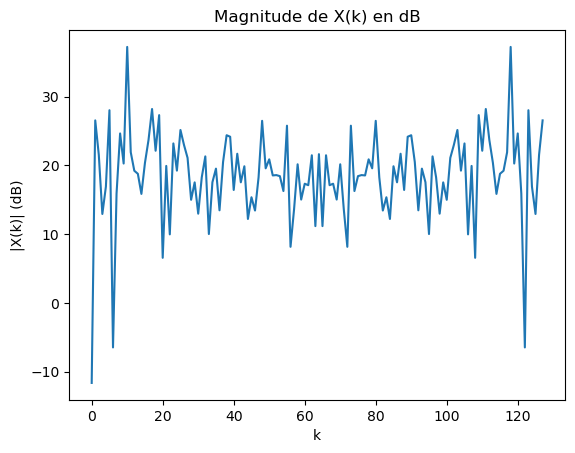

In [11]:
#Question 1
import numpy as np
import matplotlib.pyplot as plt

def fourier(k, N):
    ek = []  # Initialiser ek comme une liste vide
    for i in range(N):  # Commencer la boucle à 0 pour inclure le premier élément
        ek.append(np.exp(1j * 2 * np.pi * k * i / N)/sqrt(N))
    return np.array(ek)  # Convertir la liste en un tableau NumPy avant de retourner


#Question 2
def compute_matrix_E(N):
    return np.column_stack([fourier(k, N) for k in range(N)])

N = 4
E = compute_matrix_E(N)
print("E*E:\n", np.round(np.conj(E.T) @ E, 2))

#Question 3
N = 64
ks = [0, 1, 2, 3]

for k in ks:
    plt.plot(np.real(fourier(k, N)), label=f'Re(e_{k}(n))')
plt.legend()
plt.title("Partie réelle de e_k(n) en fonction de n")
plt.xlabel("n")
plt.ylabel("Re(e_k(n))")
plt.show()

#Question 4
def tfd(x):
    N = len(x)
    return np.array([np.dot(x, np.conj(fourier(k, N))) for k in range(N)])

# Vérification avec un vecteur aléatoire
x = np.random.rand(8)
X_manual = tfd(x)
X_numpy = np.fft.fft(x)

print("Manual TFD:", np.round(X_manual, 2))
print("NumPy FFT:", np.round(X_numpy, 2))


#Application
N = 128
f0 = 10 / N
n = np.arange(N)
x = np.cos(2 * np.pi * f0 * n) + np.random.normal(0, 1, N)

plt.figure()
plt.plot(n, x)
plt.title("Signal x(n) en fonction de n")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.show()

X = np.fft.fft(x)
plt.figure()
plt.plot(20 * np.log10(np.abs(X)))
plt.title("Magnitude de X(k) en dB")
plt.xlabel("k")
plt.ylabel("|X(k)| (dB)")
plt.show()
